In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_model import ARMA

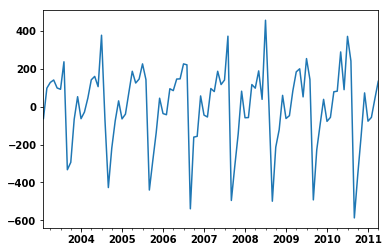

In [3]:
df_ice = pd.read_csv('../../data/chapter01/icecream.csv')
y = pd.Series(df_ice.expenditure_yen.values, 
              index=pd.date_range('2003-1', periods=len(df_ice), freq='M'))
y = y.astype('f')
y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [4]:
# 次数選択の指標にAICとBICを選択
info_criteria = stattools.arma_order_select_ic(y_diff, ic=['aic', 'bic'])
# AICとBICが最小になる次数をそれぞれ表示
info_criteria.aic_min_order, info_criteria.bic_min_order

C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


((4, 2), (4, 2))

C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<BarContainer object of 99 artists>

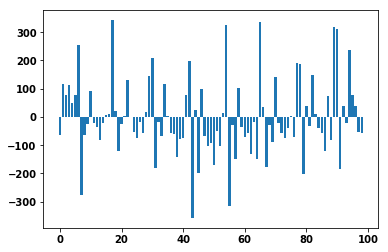

In [5]:
# p=4, q=2のARMAモデルのインスタンスを生成
model = ARMA(y_diff, (4, 2))
# y_diffに対してモデルを当てはめる
results = model.fit()
# 残差の抽出
res = results.resid
# 残差の出力
plt.bar(range(len(res)), res)

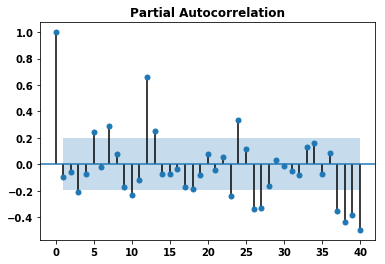

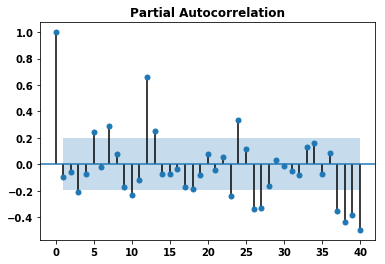

In [6]:
# 偏自己相関
tsaplots.plot_pacf(res, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


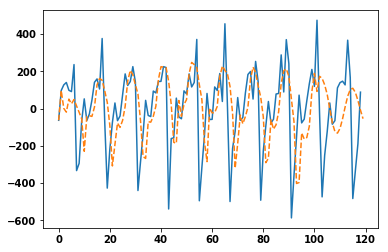

In [7]:
# 1次階差系列の表示
plt.plot(y.diff().dropna().values, label="observation")
# ARMA(4, 2)による推定値の表示
# np.hstack()はnp.concatenate()でもよい
plt.plot(np.hstack([y_diff[:2], 
                    results.fittedvalues, 
                    results.predict(99-2, 115, dynamic=True)]), 
         '--', label="forecast")